# Plot human tips vs. circulation time 

After running the analysis in `human-tips-vs-persistence-times.ipynb`, I now want to analyze the output tsv. In this notebook, I want to look at a few things: 

1. Is the amount of time H5N1 circulates in domestic birds predictive of increased risk of human infection? 
2. Is having human tips or not associated with differences in circulation/persistence times? 

In [1]:
import glob
import re,copy, imp
import pandas as pd 
import numpy as np

# for this to work, you will need to download the most recent version of baltic, available here 
bt = imp.load_source('baltic', '/Users/lmoncla/src/baltic/baltic/baltic.py')

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import matplotlib.colors as clr
import textwrap as textwrap
from textwrap import wrap

import time
from io import StringIO

import rpy2
%load_ext rpy2.ipython

In [2]:
from datetime import date
current_date = str(date.today())

# define colors 
domestic_color="#4E83AE"
wild_color="#CEB540"
human_color="#DE4428"

In [3]:
# read dataframe back in 
df = pd.read_csv("beast-runs/2021-07-26-mascot-3deme-skyline-with-mig-fixed-log/with-extra-logger/combined-muts-trees-2021-08-23.muts-circulation-time-vs-human-tips-2022-04-02.tsv", sep="\t")

In [5]:
df_first_1000_trees = df[df["tree_number"] <= 1000]

print(len(df_first_1000_trees), len(df))
df_first_1000_trees.head()

142149 518358


,Unnamed: 0,tree_number,subtree_number,circulation_time,n_human_tips,tips_in_subtree
0,0,1,1,2.518589,2,['A/Chicken/HongKong/786/1997|1997.0|1997-XX-X...
1,0,1,2,0.607684,0,['A/Goose/Guangdong/1/1996|1996.0|1996-XX-XX|A...
2,0,1,3,1.901901,0,['A/duck/Guangxi/07/1999|1999.0|1999-XX-XX|Avi...
3,0,1,4,0.447087,0,['A/Goose/HongKong/3853/2000|2000.0|2000-XX-XX...
4,0,1,5,0.657898,0,['A/Goose/HongKong/761/2001|2001.0|2001-XX-XX|...


In [12]:
%%R -w 800 -h 500 -u px -i df,current_date,human_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

#df <- df_first_1000_trees

reg1 <- lm(n_human_tips~circulation_time,data=df) 
print(summary(reg1))


Call:
lm(formula = n_human_tips ~ circulation_time, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.504  -0.459   0.370   0.749  93.209 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.926546   0.004743  -195.3   <2e-16 ***
circulation_time  1.534797   0.002051   748.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.947 on 518356 degrees of freedom
Multiple R-squared:  0.5192,	Adjusted R-squared:  0.5192 
F-statistic: 5.597e+05 on 1 and 518356 DF,  p-value: < 2.2e-16




Call:
lm(formula = circulation_time ~ n_human_tips, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.1665  -0.7154  -0.4451   0.1472  16.0717 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.8753974  0.0019610   446.4   <2e-16 ***
n_human_tips 0.3382758  0.0004522   748.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.383 on 518356 degrees of freedom
Multiple R-squared:  0.5192,	Adjusted R-squared:  0.5192 
F-statistic: 5.597e+05 on 1 and 518356 DF,  p-value: < 2.2e-16



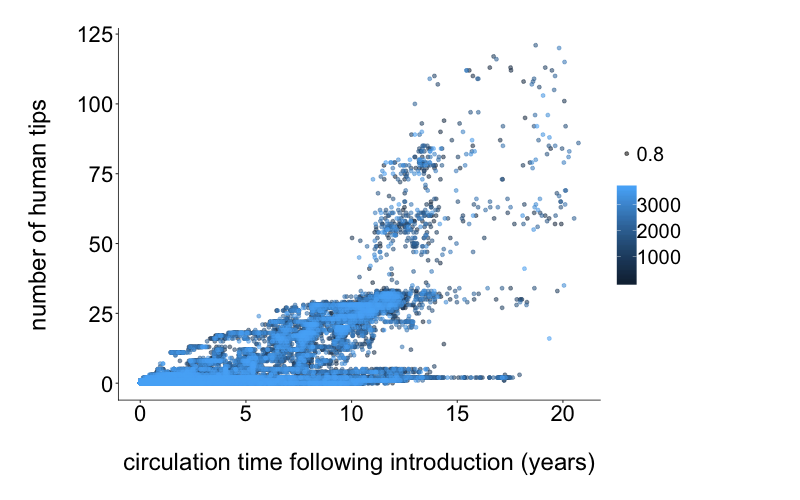

In [9]:
%%R -w 800 -h 500 -u px -i df,current_date,human_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

#df <- df_first_1000_trees

output_filename = paste("circulation-time-vs-human-tips-",current_date,".pdf", sep="")

p <- ggplot(data=df, aes(x=circulation_time, y=n_human_tips, color=tree_number, alpha = 0.8)) + 
    geom_point()+
    labs(x="\ncirculation time following introduction (years)", y="number of human tips\n")+
#      scale_y_continuous(breaks=seq(0,40,5), limits=c(0,40))+
#      scale_x_continuous(breaks=seq(0,15,3), limits=c(0,15))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 10, height = 6, device = "pdf", path = "figures", dpi = 300)
p


Call:
lm(formula = circulation_time ~ n_human_tips, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.1665  -0.7154  -0.4451   0.1472  16.0717 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.8753974  0.0019610   446.4   <2e-16 ***
n_human_tips 0.3382758  0.0004522   748.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.383 on 518356 degrees of freedom
Multiple R-squared:  0.5192,	Adjusted R-squared:  0.5192 
F-statistic: 5.597e+05 on 1 and 518356 DF,  p-value: < 2.2e-16



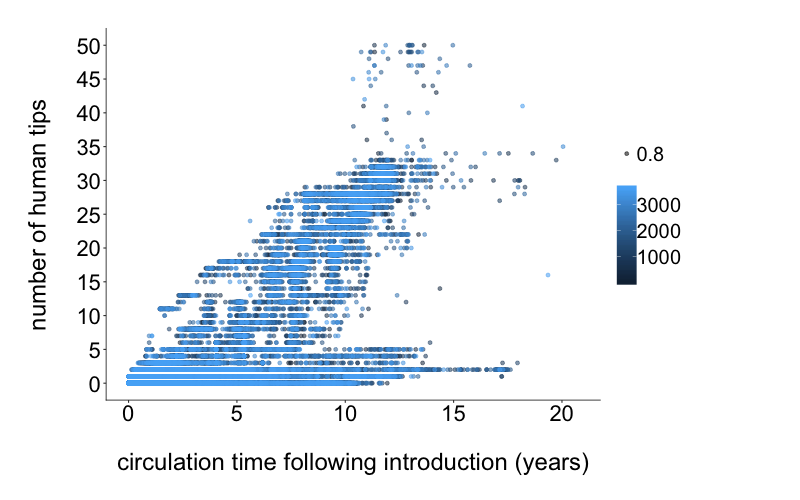

In [10]:
%%R -w 800 -h 500 -u px -i df,current_date,human_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

output_filename = paste("circulation-time-vs-human-tips-subset-",current_date,".png", sep="")

p <- ggplot(data=df, aes(x=circulation_time, y=n_human_tips, color=tree_number, alpha = 0.8)) + 
    geom_point()+
    labs(x="\ncirculation time following introduction (years)", y="number of human tips\n")+
    scale_y_continuous(breaks=seq(0,50,5), limits=c(0,50))+
#      scale_x_continuous(breaks=seq(0,15,3), limits=c(0,15))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 10, height = 6, device = "png", path = "figures", dpi = 300)
p

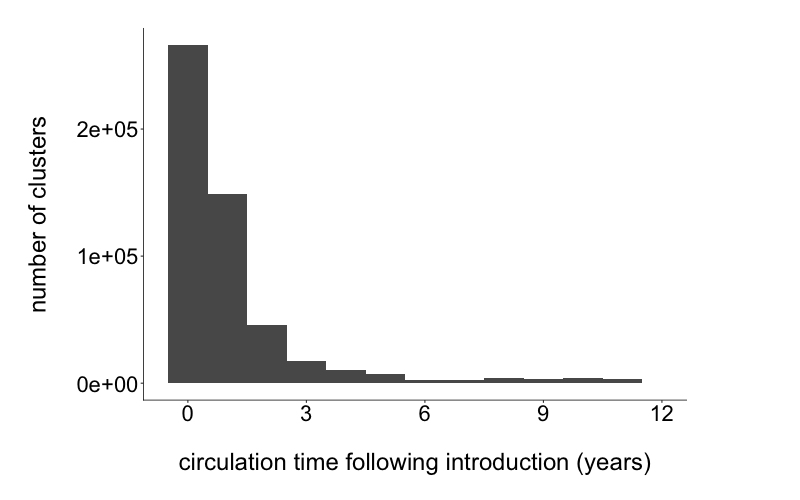

In [11]:
%%R -w 800 -h 500 -u px -i df,current_date,human_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)


output_filename = paste("circulation-times-in-domestic-",current_date,".pdf", sep="")

p <- ggplot(data=df, aes(x=circulation_time)) + 
    geom_histogram(binwidth=1)+
    labs(x="\ncirculation time following introduction (years)", y="number of clusters\n")+
#      scale_y_continuous(breaks=seq(0,40,5), limits=c(0,40))+
    scale_x_continuous(breaks=seq(0,12,3), limits=c(-0.5,12))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 10, height = 6, device = "pdf", path = "figures", dpi = 300)
p

In [8]:
nonzero = df[df['circulation_time'] > 0]
print(len(nonzero))

518358


In [14]:
# let's look separately at clusters with 0 and >0 human tips 
no_human_tips = df[df["n_human_tips"] == 0]
some_human_tips = df[df["n_human_tips"] > 0]

print(len(no_human_tips), len(some_human_tips))

428056 90302


In [15]:
# let's try plotting a histogram of thee distribution of circulation times for clusters that have 0 human tips

In [17]:
# plot together 
df['human_tips'] = np.where(df['n_human_tips']==0, 0, 1)
df.head()

,Unnamed: 0,tree_number,subtree_number,circulation_time,n_human_tips,tips_in_subtree,human_tips
0,0,1,1,2.518589,2,['A/Chicken/HongKong/786/1997|1997.0|1997-XX-X...,1
1,0,1,2,0.607684,0,['A/Goose/Guangdong/1/1996|1996.0|1996-XX-XX|A...,0
2,0,1,3,1.901901,0,['A/duck/Guangxi/07/1999|1999.0|1999-XX-XX|Avi...,0
3,0,1,4,0.447087,0,['A/Goose/HongKong/3853/2000|2000.0|2000-XX-XX...,0
4,0,1,5,0.657898,0,['A/Goose/HongKong/761/2001|2001.0|2001-XX-XX|...,0


In [18]:
# let's see whether it makes to run this as a logistic regression on having human tips or not 
%R -i df
%R model.human_tips = glm(human_tips~circulation_time,data=df,family = binomial(link="logit"),na.action(na.omit))
%R print(summary(model.human_tips))  # print the summary
%R print(exp(coef(model.human_tips)))  # exponentiate the coefficients
%R print(exp(confint(model.human_tips)))   # exponentiate the confidence intervals
%R print(anova(model.human_tips, test="Chisq"))  # run a chi square?


Call:
glm(formula = human_tips ~ circulation_time, family = binomial(link = "logit"), 
    data = df, weights = na.action(na.omit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0472  -0.5072  -0.4480  -0.4209   2.2334  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.409598   0.005470  -440.5   <2e-16 ***
circulation_time  0.589956   0.002603   226.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 479477  on 518357  degrees of freedom
Residual deviance: 383971  on 518356  degrees of freedom
AIC: 383975

Number of Fisher Scoring iterations: 5



     (Intercept) circulation_time 
       0.0898514        1.8039082 


/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Waiting for profiling to be done...

  warnings.warn(x, RRuntimeWarning)


                      2.5 %     97.5 %
(Intercept)      0.08889196 0.09081865
circulation_time 1.79474944 1.81315659


Analysis of Deviance Table

Model: binomial, link: logit

Response: human_tips

Terms added sequentially (first to last)


                 Df Deviance Resid. Df Resid. Dev  Pr(>Chi)    
NULL                            518357     479477              
circulation_time  1    95506    518356     383971 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


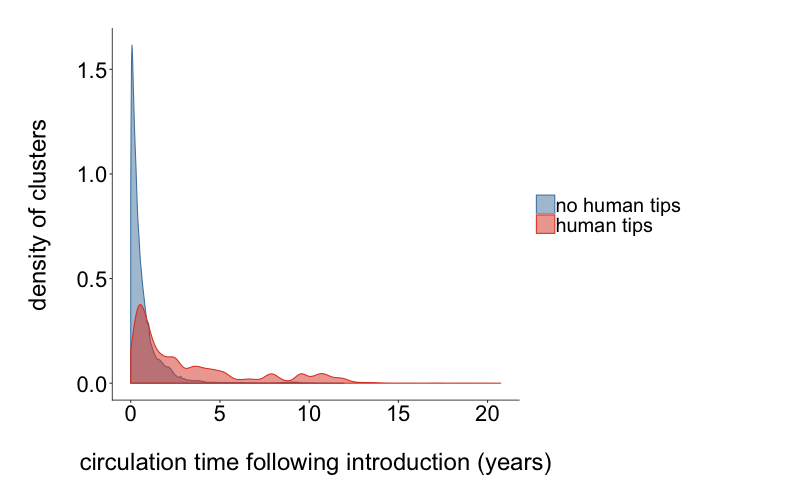

In [22]:
%%R -w 800 -h 500 -u px -i df,current_date,human_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

df$human_tips = as.character(df$human_tips)
output_filename = paste("circulation-times-density-",current_date,".pdf", sep="")

p <- ggplot(data=df, aes(x=circulation_time, color=human_tips, fill=human_tips)) + 
    geom_density(alpha=0.5, trim=TRUE)+
    #geom_histogram(binwidth=1, position="dodge")+
    labs(x="\ncirculation time following introduction (years)", y="density of clusters\n")+
    scale_color_manual(values=c("0"=domestic_color, "1"=human_color), labels=c("0"="no human tips", "1"="human tips"))+
    scale_fill_manual(values=c("0"=domestic_color, "1"=human_color), labels=c("0"="no human tips", "1"="human tips"))+
#      scale_y_continuous(breaks=seq(0,40,5), limits=c(0,40))+
#     scale_x_continuous(breaks=seq(0,12,3), limits=c(-0.5,12))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 10, height = 6, device = "pdf", path = "figures", dpi = 300)
p